# 19-4 DRILL: KNN Regression

- KNN is also a reasonable algorithm for regression.
- n KNN classification  each of the  𝑘 oberservations voted for a category. As a regression they vote instead for a value. Then instead of taking the most popular response, the algorithm averages all of the votes. If you have weights you perform a weighted average.

- Can we train our model to predict BPM? This is not classification as Jazz or Rock - but this is continuous - we are predicting BPM given loudness and then later - duration?

## KNN Regresson to predict BPM of a song


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn import metrics


%matplotlib inline

## Create data (load and read)

In [2]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [3]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


## KNN regression model
- we are using KNeighborsRegressor with the K number


In [18]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness) # data - only considering loudness now
Y = music.bpm # target variable
knn.fit(X, Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

## Train the model

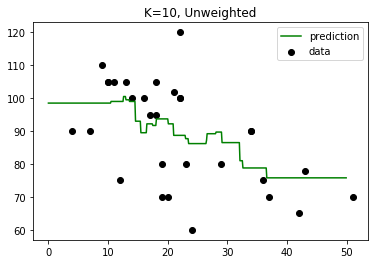

In [19]:
# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

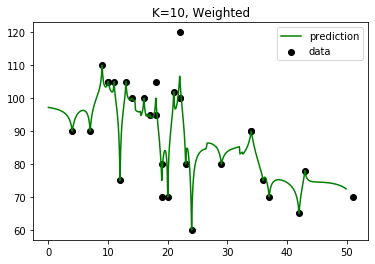

In [20]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

* This is overfitting

## Validating KNN
- Cross validation is still tremendously valuable. 
- You can do holdouts. 
- You even still get an  𝑅2 R2 value for the regression.

In [21]:
# validate that overfitting of the previous model with some k-fold cross validation
# The test statistic given by this model is  𝑅2, which measures the same as in linear regression.

from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


####  these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

## Example

* Add the other feature and mess around with k and weighting to see if you can do any better than we've done so far?

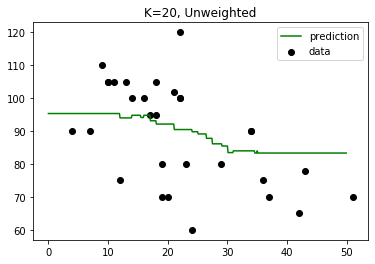

In [32]:
# Create the model
knn_drill = neighbors.KNeighborsRegressor(n_neighbors=15)
X = pd.DataFrame(music.loudness) # data - only considering loudness now
#X = pd.DataFrame(music.duration)
Y = music.bpm # target variable

# train the model
knn_drill.fit(X, Y)

# test the model
T_drill = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_drill = knn_drill.predict(T_drill)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T_drill, Y_drill, c='g', label='prediction')
plt.legend()
plt.title('K=20, Unweighted')
plt.show()


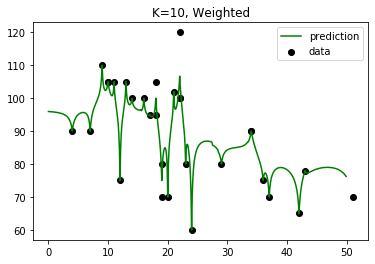

In [35]:
# Run the same model, this time with weights.
knn_drill_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_drill_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_drill_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [36]:
score_drill = cross_val_score(knn_drill, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_drill.mean(), score_drill.std() * 2))

score_drill_w = cross_val_score(knn_drill_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_drill_w.mean(), score_drill_w.std() * 2))

Unweighted Accuracy: -0.09 (+/- 0.42)
Weighted Accuracy: 0.13 (+/- 0.73)


### Magda question
- what shoudl the accuracy be? what should that line look like?
- What other features should I use for this example?
- when to use weighted and not weighted?